In [14]:
import pandas as pd
import numpy as np
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D

In [4]:
file = "../Fluorine derivatives/pKa_Prediction_Starting data_2023.11.22.xlsx"
cols = ["Reference", "Smiles", "LogP", "pKa", "Amine or acid", "Framework",
        "F group", "Atoms in ring", "Amides for LogP"]
main_list_df = pd.read_excel(open(file, 'rb'),
                             sheet_name='Main_List',
                             usecols=cols,
                             skiprows=range(1, 2))
# technical_list_df = pd.read_excel(open(file, 'rb'), sheet_name='Technical list')
main_list_df.head()

,Reference,Smiles,LogP,pKa,Amine or acid,Framework,F group,Atoms in ring,Amides for LogP
0,10.1016/j.jfluchem.2023.110215,FC1(F)CCC(C(O)=O)CC1,2.63,4.32,Acid,cyclohexane,gem-CF2,6,FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1
1,10.1016/j.jfluchem.2023.110215,OC(C1CCCCC1)=O,2.88,4.85,Acid,cyclohexane,non-F,6,O=C(NC1=CC=CC=C1)C1CCCCC1
2,10.1016/j.jfluchem.2023.110215,OC([C@@H]1C[C@H]2C[C@H]2C1)=O,2.87,4.35,Acid,bicyclo[3.1.0]hexane,non-F,6,O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1
3,10.1016/j.jfluchem.2023.110215,OC([C@H]1C[C@H]2C[C@H]2C1)=O,2.92,4.24,Acid,bicyclo[3.1.0]hexane,non-F,6,O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1
4,10.1016/j.jfluchem.2023.110215,OC([C@H]1C[C@H]2C(F)(F)[C@H]2C1)=O,2.37,3.80,Acid,bicyclo[3.1.0]hexane,gem-CF2,6,FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1


# Groups by ring size

In [40]:
atoms_in_the_ring = main_list_df.groupby(['Atoms in ring'])
print("There are {} unique frameworks in the dataset:".format(len(atoms_in_the_ring.groups.keys())))
for k in atoms_in_the_ring.groups.keys():
    print("Ring size:", k, " - ", len(atoms_in_the_ring.get_group(k)))

There are 8 unique frameworks in the dataset:
Ring size: 0  -  20
Ring size: 3  -  20
Ring size: 4  -  41
Ring size: 5  -  26
Ring size: 6  -  44
Ring size: 7  -  16
Ring size: 8  -  8
Ring size: 9  -  8


# Ring size = 0, Acids

In [106]:
def get_smiles_list(source_df, group_title, group_id, acid_or_amine, smiles_col="Smiles"):
    groups = source_df.groupby([group_title])
    group_df = groups.get_group(group_id)
    subgroup_df = group_df.loc[group_df['Amine or acid'] == acid_or_amine]
    smiles_list = sorted(subgroup_df[smiles_col].tolist(), key=len)
    smiles_mols = [Chem.MolFromSmiles(smile) for smile in smiles_list]
    return smiles_list, smiles_mols

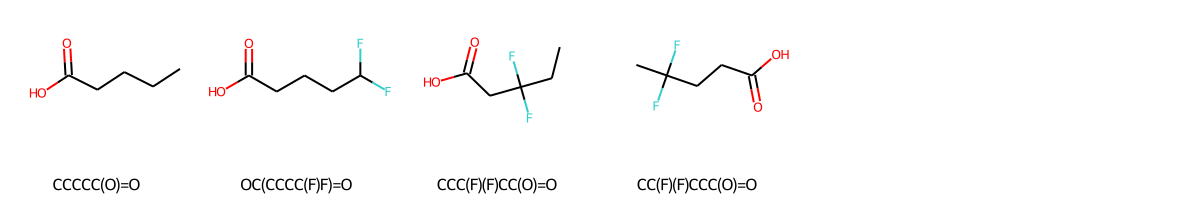

In [76]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=0,
                                           acid_or_amine="Acid")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

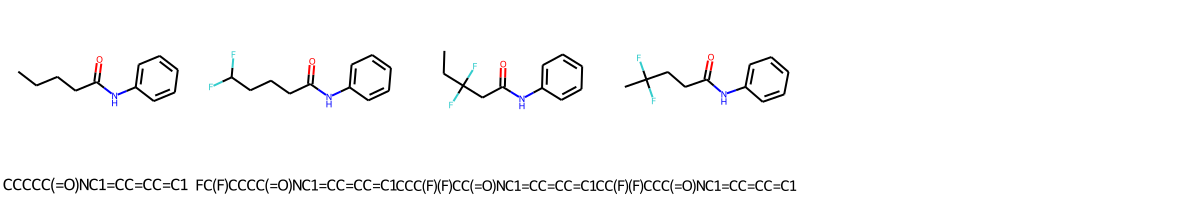

In [107]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=0,
                                           acid_or_amine="Acid",
                                           smiles_col="Amides for LogP")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 0, Free Amines

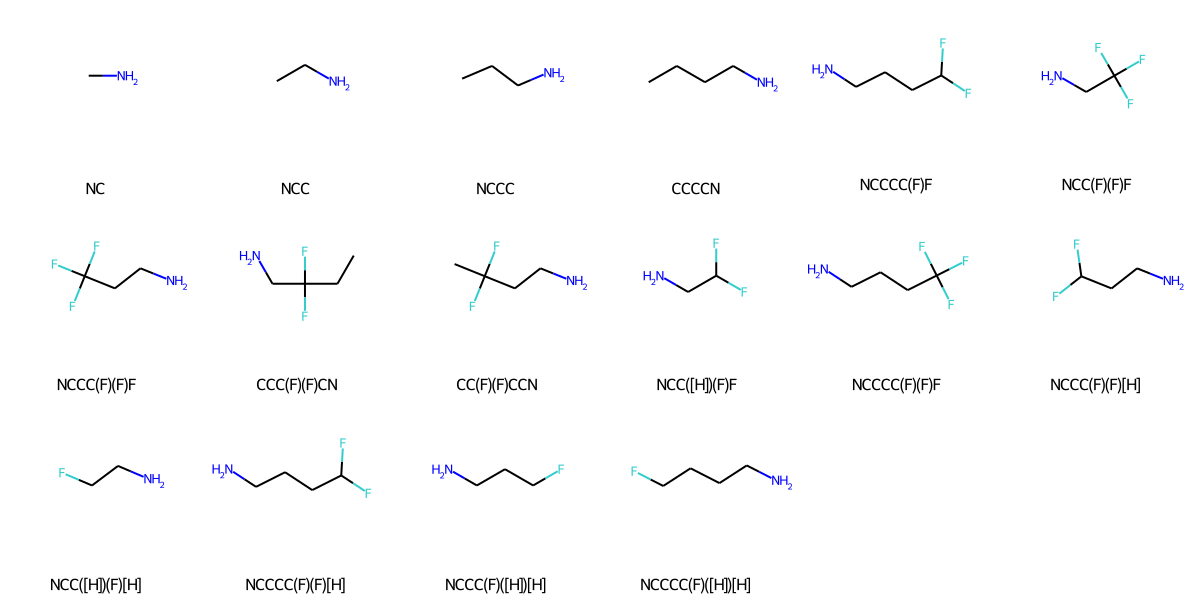

In [77]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=0,
                                           acid_or_amine="Amine")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 0, N-benzoyl Amines

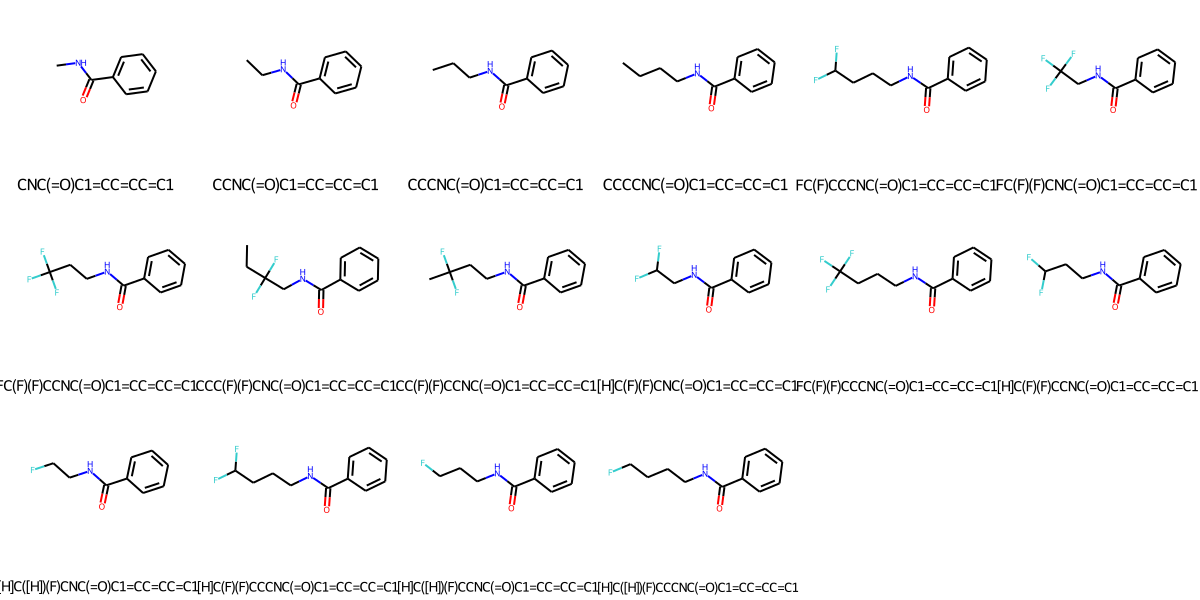

In [108]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=0,
                                           acid_or_amine="Amine",
                                           smiles_col="Amides for LogP")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 3, Acids

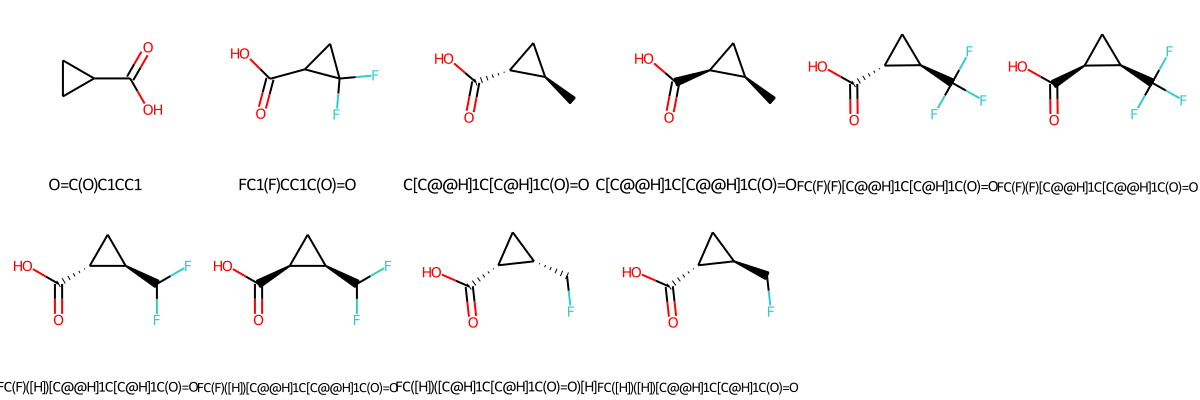

In [78]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=3,
                                           acid_or_amine="Acid")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 3, Amines

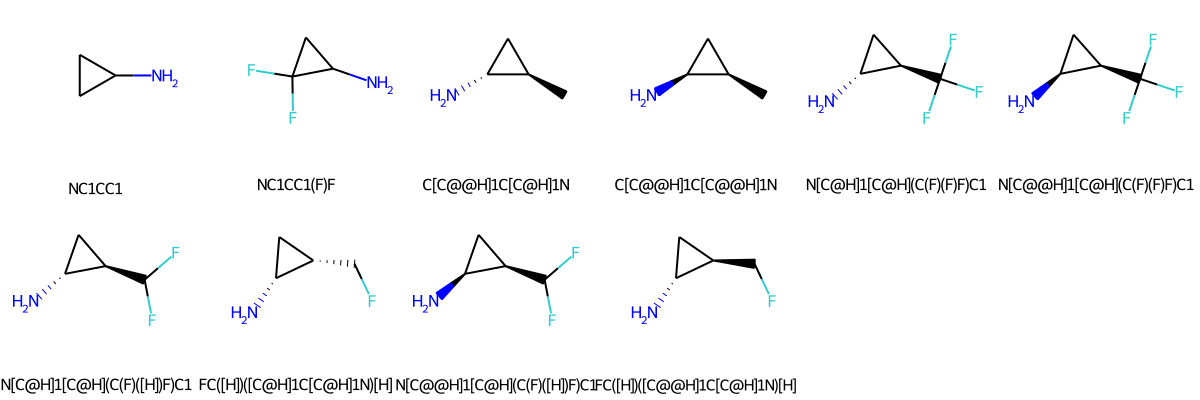

In [80]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=3,
                                           acid_or_amine="Amine")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 4, Acids

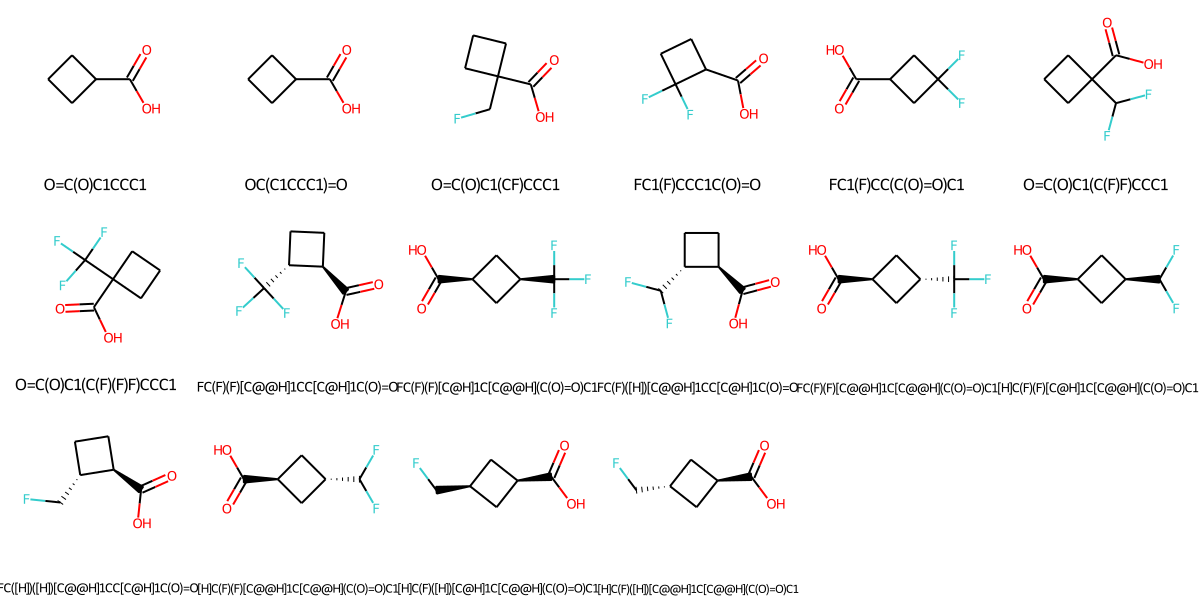

In [81]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=4,
                                           acid_or_amine="Acid")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 4, Amines

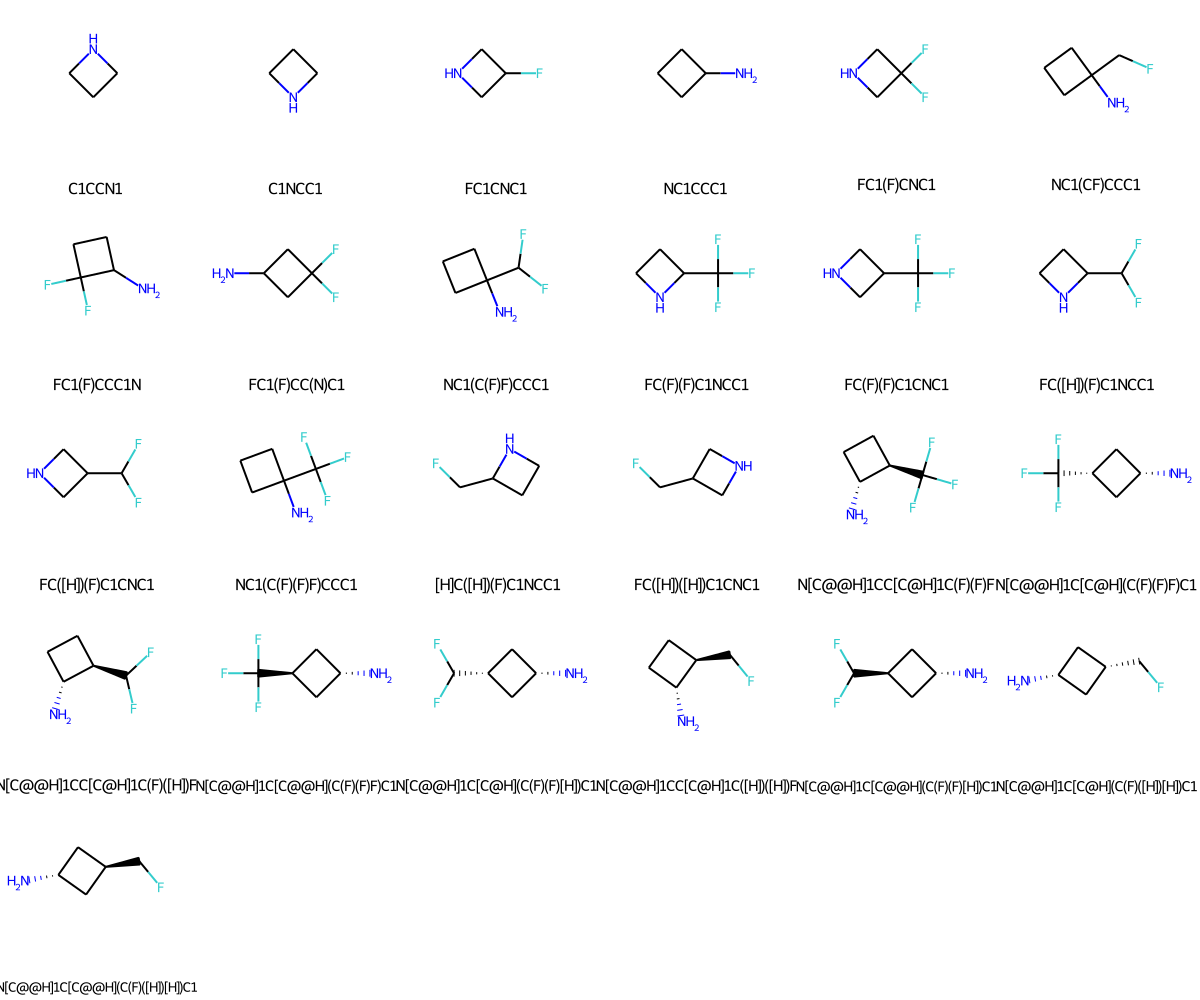

In [82]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=4,
                                           acid_or_amine="Amine")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 5, Acids

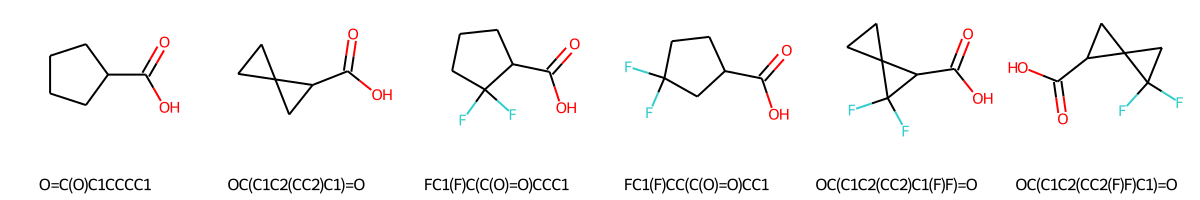

In [83]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=5,
                                           acid_or_amine="Acid")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 5, Amines

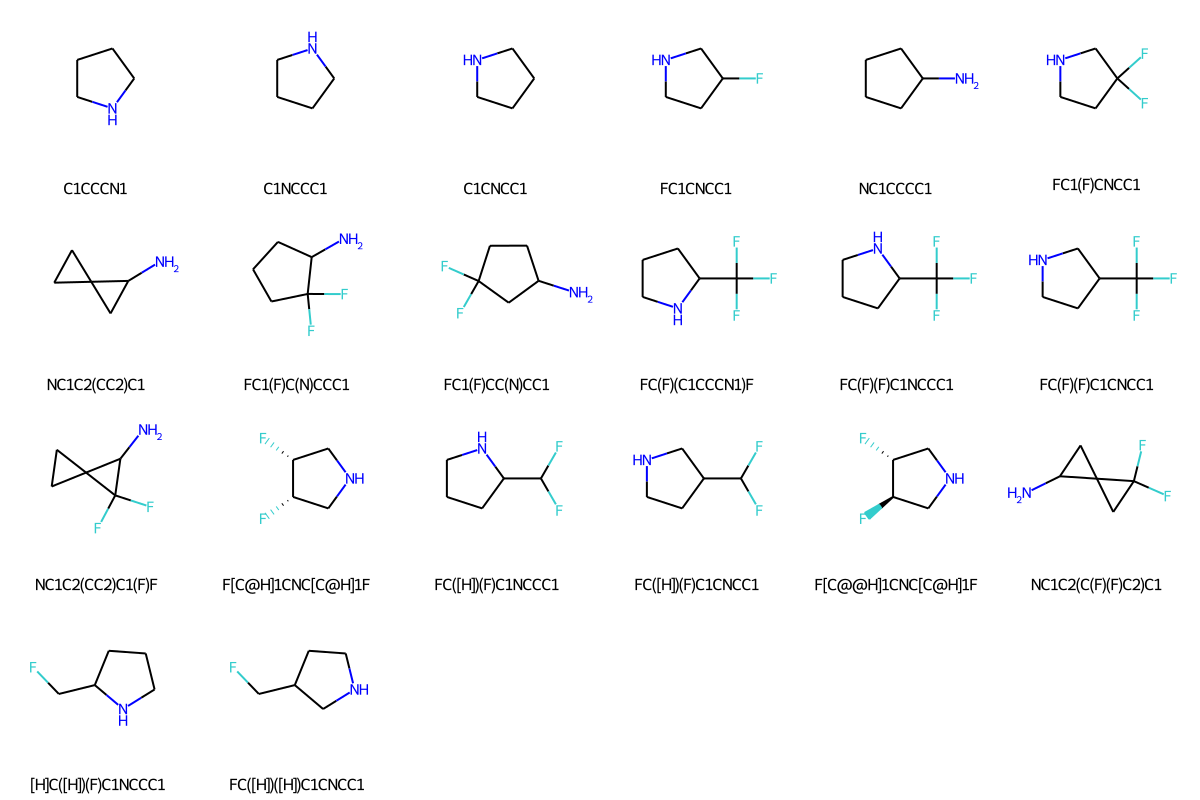

In [84]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=5,
                                           acid_or_amine="Amine")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 6, Acids

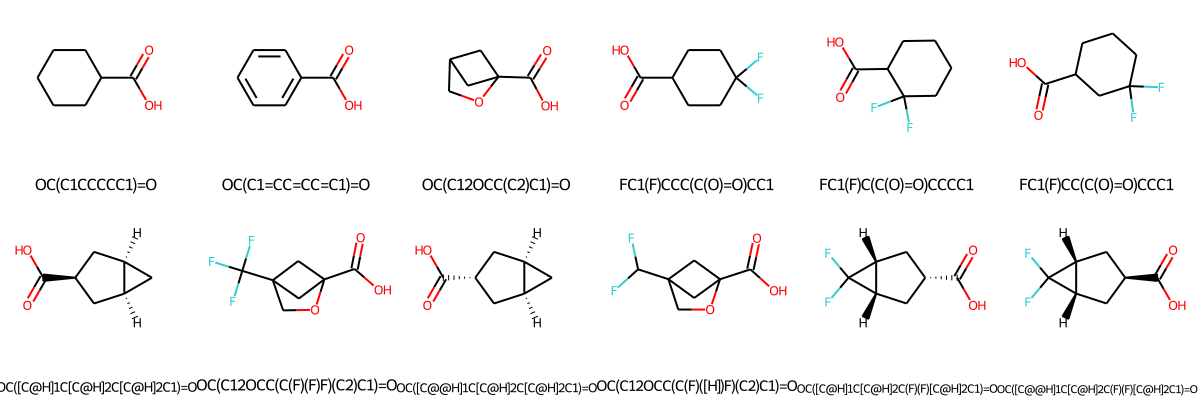

In [85]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=6,
                                           acid_or_amine="Acid")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 6, Amines

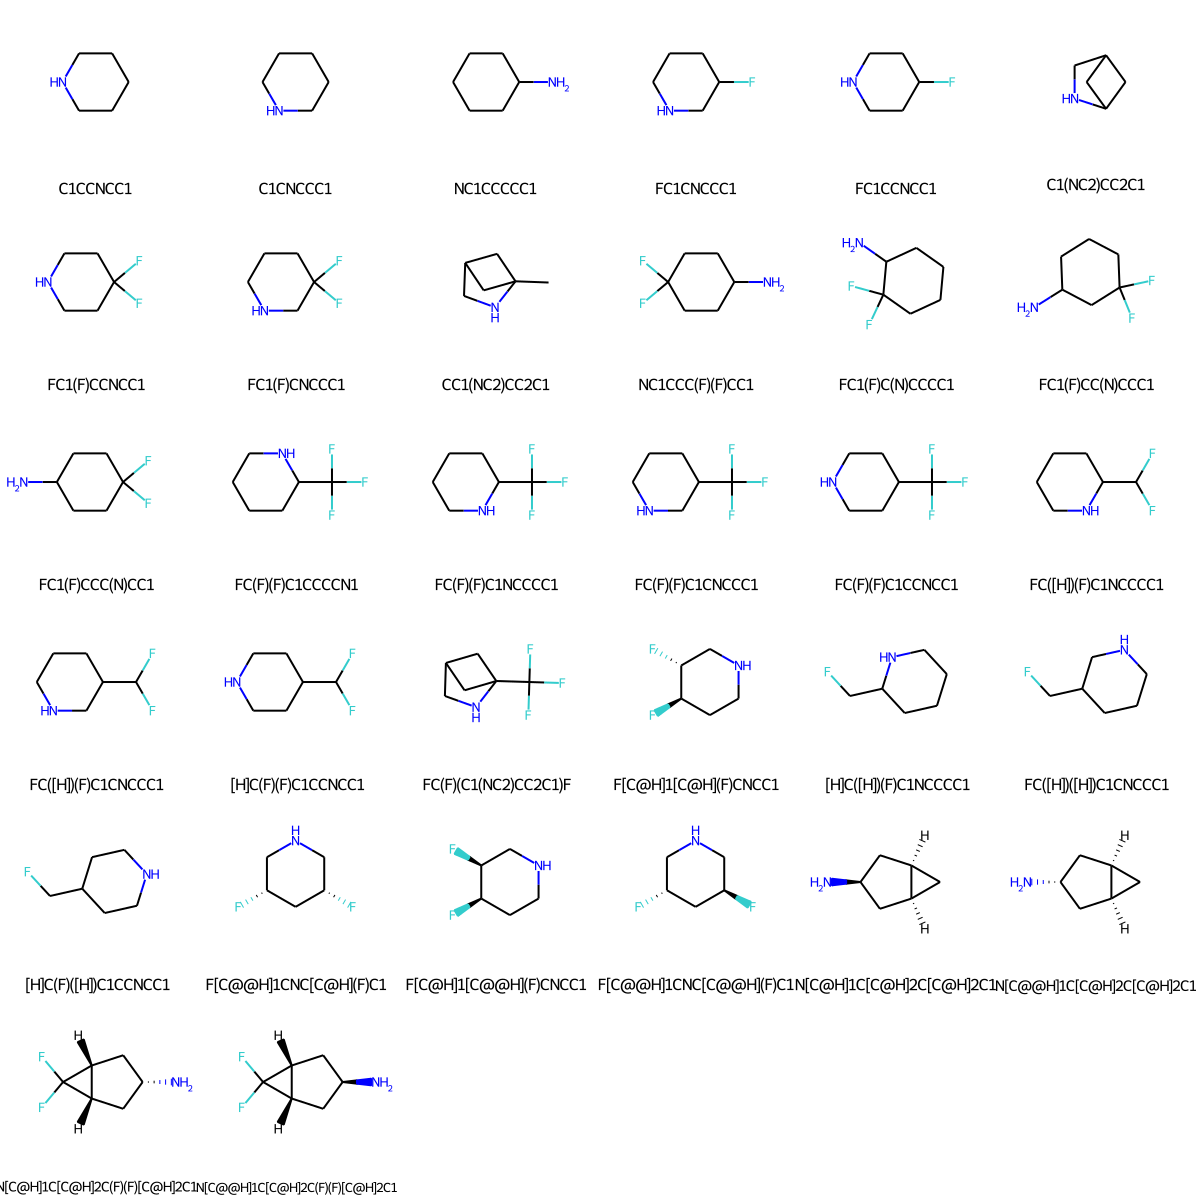

In [87]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=6,
                                           acid_or_amine="Amine")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 7, Acids

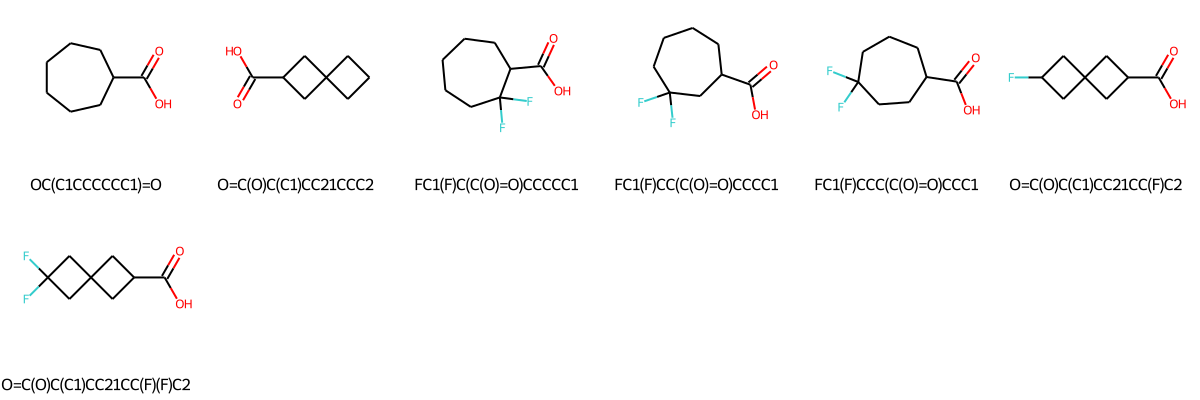

In [88]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=7,
                                           acid_or_amine="Acid")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

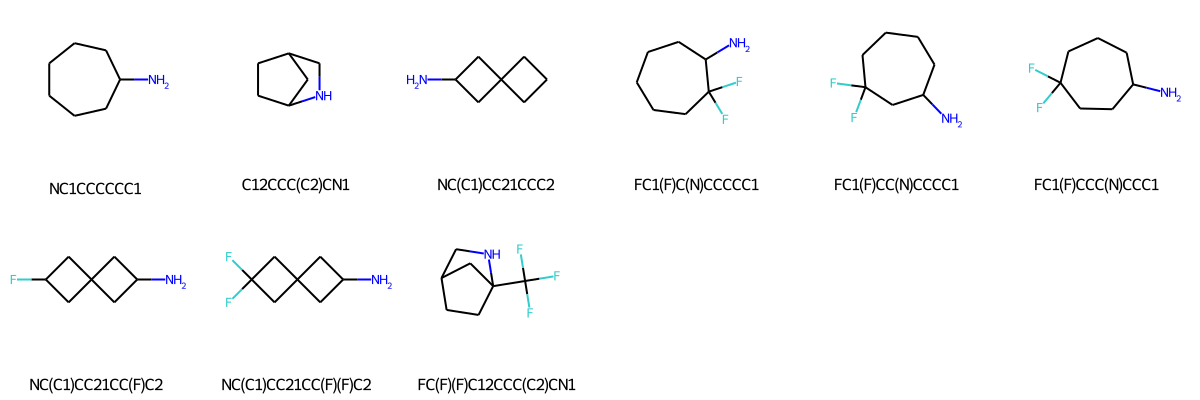

In [89]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=7,
                                           acid_or_amine="Amine")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 8, Acids

In [90]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=8,
                                           acid_or_amine="Acid")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

No acids with ring size 8

# Ring size = 8, Amines

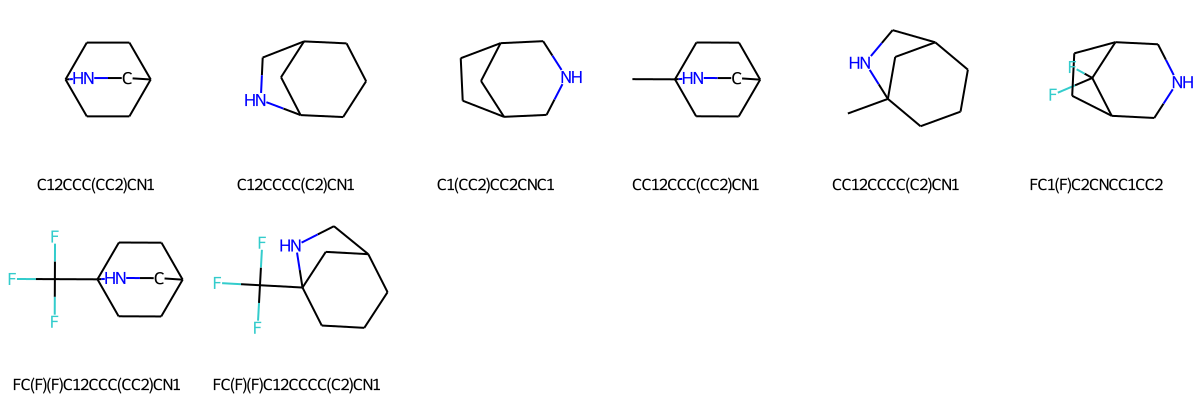

In [91]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=8,
                                           acid_or_amine="Amine")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Ring size = 9, Acids

In [102]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=9,
                                           acid_or_amine="Acid")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

No acids with ring size 9

# Ring size = 9, Amines

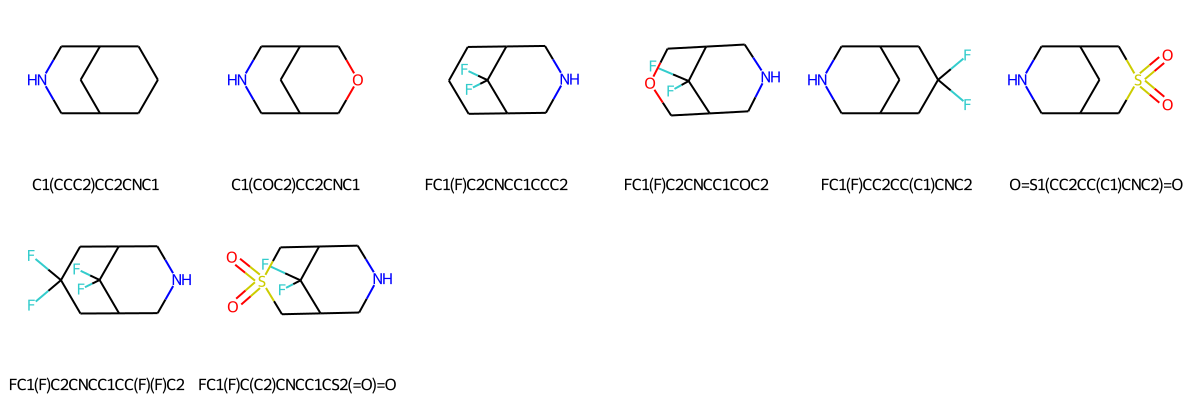

In [101]:
smiles_list, smiles_mols = get_smiles_list(source_df=main_list_df,
                                           group_title='Atoms in ring',
                                           group_id=9,
                                           acid_or_amine="Amine")
MolsToGridImage(mols=smiles_mols,
                legends=smiles_list,
                molsPerRow=6)

# Groups by framework

In [34]:
frameworks = main_list_df.groupby(['Framework'])
print("There are {} unique frameworks in the dataset:".format(len(frameworks.groups.keys())))
for k in frameworks.groups.keys():
    print("Framework:", k, " - ", len(frameworks.get_group(k)))

There are 14 unique frameworks in the dataset:
bicyclo[2.1.1]hexane  -  6
bicyclo[2.2.1]heptane  -  2
bicyclo[2.2.2]octane  -  3
bicyclo[3.1.0]hexane  -  8
bicyclo[3.2.1]octane  -  5
bicyclo[3.3.1]nonane  -  8
cyclobutane  -  41
cycloheptane  -  8
cyclohexane  -  30
cyclopentane  -  20
cyclopropane  -  20
methane  -  20
spiro[2.2]pentane  -  6
spiro[3.3]heptane  -  6


In [30]:
frameworks.get_group("methane")

,Reference,Smiles,LogP,pKa,Amine or acid,Framework,F group,Atoms in ring,Amides for LogP
26,10.1002/chem.202200331,CCC(F)(F)CC(O)=O,2.26,3.55,Acid,methane,gem-CF2,0,CCC(F)(F)CC(=O)NC1=CC=CC=C1
27,10.1002/chem.202200331,CC(F)(F)CCC(O)=O,2.12,4.17,Acid,methane,gem-CF2,0,CC(F)(F)CCC(=O)NC1=CC=CC=C1
28,10.1002/chem.202200331,OC(CCCC(F)F)=O,2.06,4.38,Acid,methane,CHF2,0,FC(F)CCCC(=O)NC1=CC=CC=C1
33,10.1002/chem.202200331,CCCCC(O)=O,2.29,4.75,Acid,methane,non-F,0,CCCCC(=O)NC1=CC=CC=C1
124,10.1002/chem.202201601,NCC(F)(F)F,1.76,5.56,Amine,methane,CF3,0,FC(F)(F)CNC(=O)C1=CC=CC=C1
125,10.1002/chem.202201601,NCC([H])(F)F,1.37,7.20,Amine,methane,CHF2,0,[H]C(F)(F)CNC(=O)C1=CC=CC=C1
126,10.1002/chem.202201601,NCC([H])(F)[H],1.07,8.96,Amine,methane,CH2F,0,[H]C([H])(F)CNC(=O)C1=CC=CC=C1
127,10.1002/chem.202201601,NC,1.03,10.78,Amine,methane,non-F,0,CNC(=O)C1=CC=CC=C1
137,10.1002/chem.202201601,NCCC(F)(F)F,1.93,8.88,Amine,methane,CF3,0,FC(F)(F)CCNC(=O)C1=CC=CC=C1
138,10.1002/chem.202201601,NCCC(F)(F)[H],1.49,9.02,Amine,methane,CHF2,0,[H]C(F)(F)CCNC(=O)C1=CC=CC=C1


# Groups by F group

In [35]:
f_groups = main_list_df.groupby(['F group'])
print("There are {} unique F groups in the dataset:".format(len(f_groups.groups.keys())))
for k in f_groups.groups.keys():
    print(k, " - ", len(f_groups.get_group(k)))

There are 6 unique F groups in the dataset:
CF3  -  29
CH2F  -  22
CHF  -  12
CHF2  -  25
gem-CF2  -  47
non-F  -  48
